In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv('04-data/preprocessed_app_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45847 entries, 0 to 45846
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   title                     45847 non-null  object 
 1   description               45847 non-null  object 
 2   summary                   45831 non-null  object 
 3   installs                  45847 non-null  object 
 4   minInstalls               45847 non-null  float64
 5   score                     45847 non-null  float64
 6   ratings                   45847 non-null  float64
 7   reviews                   45847 non-null  float64
 8   histogram                 45847 non-null  object 
 9   price                     45847 non-null  float64
 10  free                      45847 non-null  int64  
 11  currency                  45847 non-null  object 
 12  sale                      45847 non-null  bool   
 13  offersIAP                 45847 non-null  bool   
 14  inAppP

In [44]:
df1 = df[['title','minInstalls','ratings','free','containsAds','genre','editorsChoice','contentRating','year','score']]

In [45]:
df1.head()

,title,minInstalls,ratings,free,containsAds,genre,editorsChoice,contentRating,year,score
0,World War 2: Offline Strategy,1000000.0,19080.0,1,1,Strategy,0,Everyone 10+,2018.0,4.147644
1,AndroXLS editor for XLS sheets,5000000.0,9215.0,1,1,Productivity,0,Everyone,2016.0,2.973147
2,SoundSeeder -Play music simultaneously and in ...,1000000.0,7347.0,1,1,Music & Audio,0,Everyone,2013.0,3.747968
3,LibreOffice & OpenOffice document reader | ODF,5000000.0,32406.0,1,1,Productivity,0,Everyone,2010.0,3.882280
4,"All PDF - PDF Reader, PDF Viewer & PDF Converter",1000000.0,10073.0,1,1,Books & Reference,0,Everyone,2018.0,4.376968


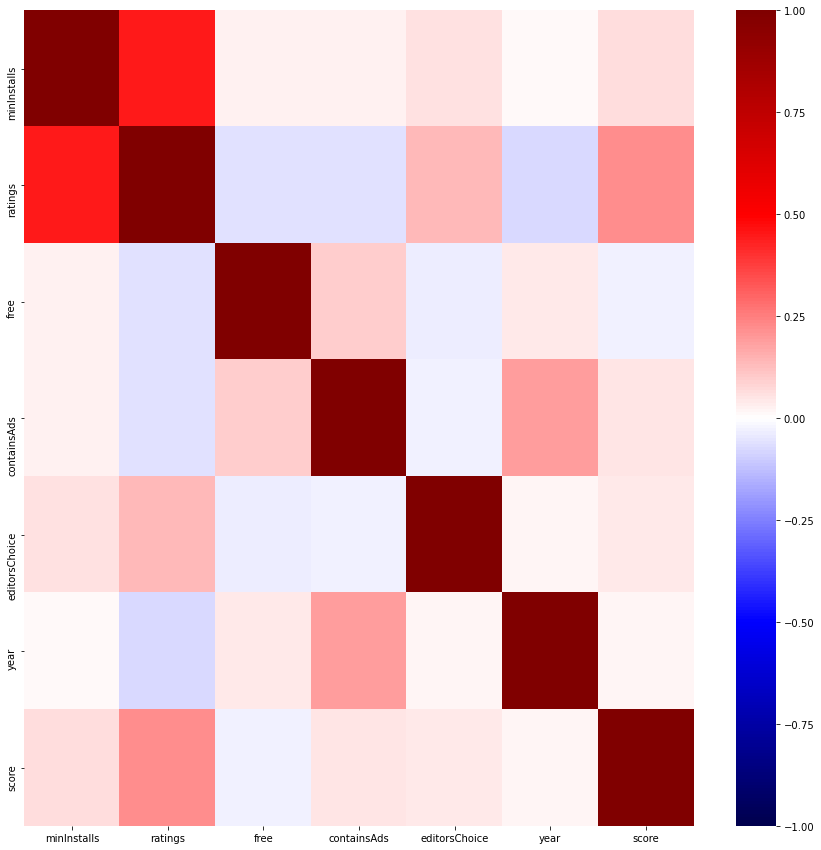

In [46]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df1.corr(), cmap="seismic", vmin=-1, vmax=1, ax=ax);

#### Observations

Fairly strong correlation between minInstalls and number of ratings. Consider dropping mininstalls given it is bucketed

<ipython-input-47-05a121070c82>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(df1[['minInstalls','ratings','year','score']], ax=ax);


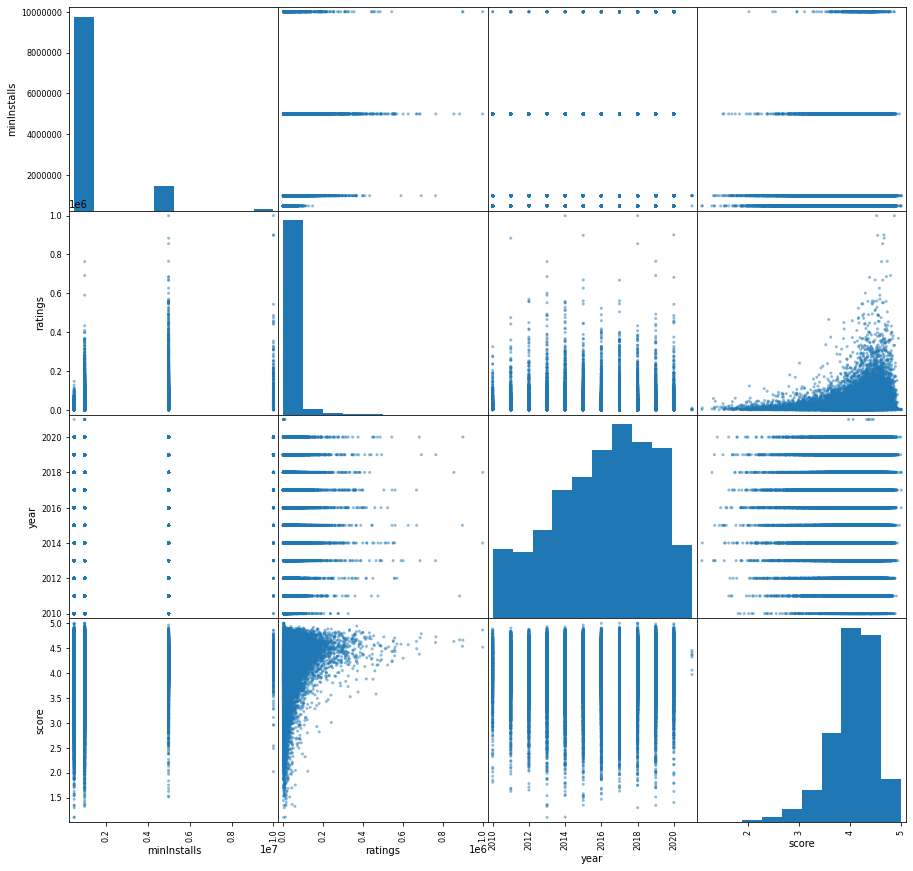

In [47]:
fig, ax = plt.subplots(figsize=(15, 15))
pd.plotting.scatter_matrix(df1[['minInstalls','ratings','year','score']], ax=ax);

#### Observations

Score (target) has a left skew although should be normally distributed enough for predictive purposes

Almost exponential shape for ratings?

### By content rating

In [48]:
df1.groupby('contentRating').count()

,title,minInstalls,ratings,free,containsAds,genre,editorsChoice,year,score
contentRating,,,,,,,,,
Everyone,35318,35318,35318,35318,35318,35318,35318,35097,35318
Everyone 10+,2021,2021,2021,2021,2021,2021,2021,2010,2021
Mature 17+,1737,1737,1737,1737,1737,1737,1737,1732,1737
Teen,6771,6771,6771,6771,6771,6771,6771,6756,6771


In [53]:
df1.groupby('contentRating')['score'].mean()

contentRating
Everyone        4.058801
Everyone 10+    4.082205
Mature 17+      3.998025
Teen            4.038796
Name: score, dtype: float64

### By app genre

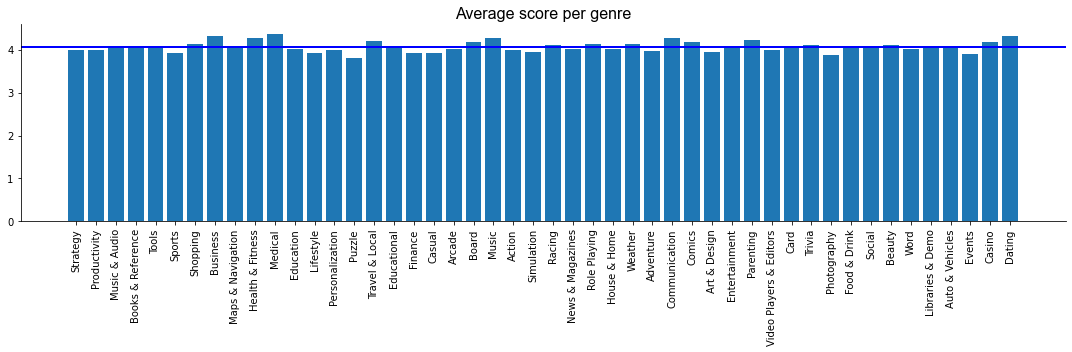

In [63]:
app_genre_score = df.groupby('genre')['score'].mean()
genre_list = df1['genre'].unique()
mean_score = df1['score'].mean()

plt.figure(figsize=[15,5])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axhline(mean_score, label= 'Mean score', color = 'blue', linewidth=2)
plt.bar(genre_list,app_genre_score)   
plt.xticks(genre_list,rotation=90)
plt.title('Average score per genre',family='arial',fontsize=16)
plt.tight_layout()

plt.show;

Does not appear to be significant differences in mean user score across genres

In [51]:
df1.groupby('genre')['score'].mean()

genre
Action                     3.992775
Adventure                  3.986396
Arcade                     4.057213
Art & Design               4.055676
Auto & Vehicles            4.083187
Beauty                     3.917746
Board                      4.136029
Books & Reference          4.323702
Business                   4.059580
Card                       4.263141
Casino                     4.368550
Casual                     4.019651
Comics                     3.928807
Communication              3.995983
Dating                     3.803210
Education                  4.209994
Educational                4.053374
Entertainment              3.916094
Events                     3.917039
Finance                    4.023216
Food & Drink               4.180135
Health & Fitness           4.263758
House & Home               3.981743
Libraries & Demo           3.934510
Lifestyle                  4.100772
Maps & Navigation          4.023798
Medical                    4.136991
Music                 

### By whether the app contains ads

In [52]:
df1.groupby('containsAds')['score'].mean()

containsAds
0    4.008688
1    4.066021
Name: score, dtype: float64

### By whether the app is an Editor's Choice

In [54]:
df1.groupby('editorsChoice')['score'].mean()

editorsChoice
0    4.052862
1    4.331528
Name: score, dtype: float64

Apps marked as 'Editor's Choice' appear to have higher average score. Makes sense given likely to promote higher quality apps

### By whether the app is free

In [55]:
df1.groupby('free')['score'].mean()

free
0    4.233492
1    4.053788
Name: score, dtype: float64

Paid-for apps appear to have a higher average score. This makes sense given you expect highr quality when you are paying for access

In [64]:
df1.groupby('editorsChoice')['free'].count()

editorsChoice
0    45565
1      282
Name: free, dtype: int64